<h4>Import bibliotek</h4>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")


<h4>Wczytanie plików do analizy</h4>

In [2]:
qual_df1 = pd.read_excel("Metabolomika_Quality1.xlsx")
qual_df2 = pd.read_excel("Metabolomika_Quality2.xlsx", sheet_name="Arkusz2")

<h4>Podział zbiorów względem grupy na blanki, kontrole jakości i próbki</h4>

In [6]:
blanki1 = qual_df1[qual_df1['Group'] == "Blank"]

In [7]:
qc1 = qual_df1[qual_df1['Group'] == "QC"]

In [12]:
probki1 = qual_df1[qual_df1['Group'] != "Blank"][qual_df1['Group'] != "QC"]

/tmp/ipykernel_61368/2555433888.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probki1 = qual_df1[qual_df1['Group'] != "Blank"][qual_df1['Group'] != "QC"]


In [14]:
blanki2 = qual_df2[qual_df2['Group'] == "Blank"]

In [15]:
qc2 = qual_df2[qual_df2['Group'] == "QC"]

In [16]:
probki2 = qual_df2[qual_df2['Group'] != "Blank"][qual_df2['Group'] != "QC"]

/tmp/ipykernel_61368/48204251.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probki2 = qual_df2[qual_df2['Group'] != "Blank"][qual_df2['Group'] != "QC"]


<h4>Policzenie średnich dla zmiennych dla każdej grupy</h4>

In [39]:
blanki1_srednia = blanki1.iloc[:,2:].mean(axis=0)

In [38]:
qc1_srednia = qc1.iloc[:,2:].mean(axis=0)

In [37]:
probki1_srednia = probki1.iloc[:,2:].mean(axis=0)

In [36]:
qc2_srednia = qc2.iloc[:,2:].mean(axis=0)

In [35]:
probki2_srednia = probki2.iloc[:,2:].mean(axis=0)

In [34]:
blanki2_srednia = blanki2.iloc[:,2:].mean(axis=0)

<h4>Policzenie różnic pomiędzy średnimi blanków a kontrolą jakości i próbek</h4>

In [56]:
blanki1_srednia.shape

(1199,)

In [52]:
(blanki1_srednia - qc1_srednia)[np.abs(blanki1_srednia - qc1_srednia) < 1_000_000]

M323    -659903.925149
M519     946930.278561
M531    -305441.800835
M830    -967312.951348
M961     102269.531121
M1115    595426.593185
M1126    577033.234351
dtype: float64

In [53]:
(blanki1_srednia - probki1_srednia)[np.abs(blanki1_srednia - probki1_srednia) < 1_000_000]

M531     -32514.360512
M555     539495.276300
M692    -432380.837203
M842     869247.747268
M851     535895.271646
M864    -203174.863467
M892     721249.498387
M919     160473.690398
M961      52752.541886
M964    -689248.452857
M967    -559074.365437
M1017    674043.271044
M1054   -481160.079041
M1055   -527740.229684
M1114    400901.985346
M1126     72468.812018
dtype: float64

In [57]:
blanki2_srednia.shape

(1199,)

In [54]:
(blanki2_srednia - qc2_srednia)[np.abs(blanki2_srednia - qc2_srednia) < 1_000_000]

M91     -130292.462952
M148     671913.639072
M154    -131680.679605
M185     -66889.175448
M207    -727053.918618
             ...      
M1195   -730054.689189
M1196   -338349.133853
M1197   -605215.701233
M1198   -575548.374679
M1199   -548011.203891
Length: 210, dtype: float64

In [55]:
(blanki2_srednia - probki2_srednia)[np.abs(blanki2_srednia - probki2_srednia) < 1_000_000]

M99     -480551.819875
M132     154483.443902
M148    -267957.663188
M225    -783877.342754
M228      58140.500246
             ...      
M1195   -269120.557933
M1196   -296514.281787
M1197   -469965.968025
M1198   -498200.914876
M1199   -330179.428825
Length: 212, dtype: float64

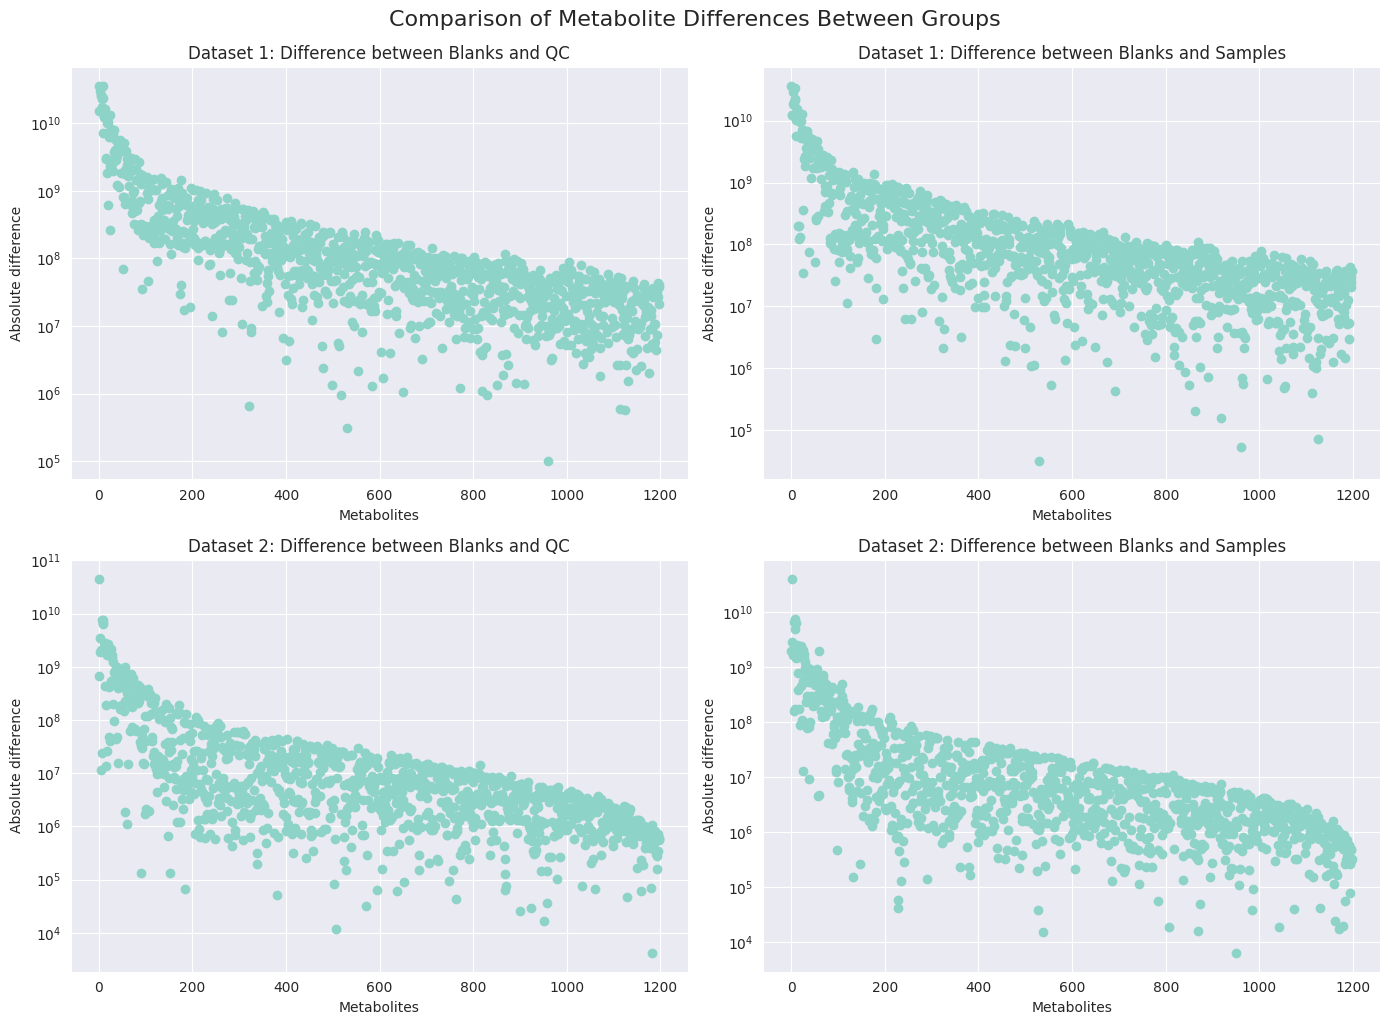

In [58]:
# Create a figure with subplots for both datasets
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create scatter plots for dataset 1
axes[0,0].scatter(range(len(blanki1_srednia)), np.abs(blanki1_srednia - qc1_srednia))
axes[0,0].set_title('Dataset 1: Difference between Blanks and QC')
axes[0,0].set_xlabel('Metabolites')
axes[0,0].set_ylabel('Absolute difference')
axes[0,0].set_yscale('log')

axes[0,1].scatter(range(len(blanki1_srednia)), np.abs(blanki1_srednia - probki1_srednia))
axes[0,1].set_title('Dataset 1: Difference between Blanks and Samples')
axes[0,1].set_xlabel('Metabolites')
axes[0,1].set_ylabel('Absolute difference')
axes[0,1].set_yscale('log')

# Create scatter plots for dataset 2
axes[1,0].scatter(range(len(blanki2_srednia)), np.abs(blanki2_srednia - qc2_srednia))
axes[1,0].set_title('Dataset 2: Difference between Blanks and QC')
axes[1,0].set_xlabel('Metabolites')
axes[1,0].set_ylabel('Absolute difference')
axes[1,0].set_yscale('log')

axes[1,1].scatter(range(len(blanki2_srednia)), np.abs(blanki2_srednia - probki2_srednia))
axes[1,1].set_title('Dataset 2: Difference between Blanks and Samples')
axes[1,1].set_xlabel('Metabolites')
axes[1,1].set_ylabel('Absolute difference')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.suptitle('Comparison of Metabolite Differences Between Groups', y=1.02, fontsize=16)
plt.show()

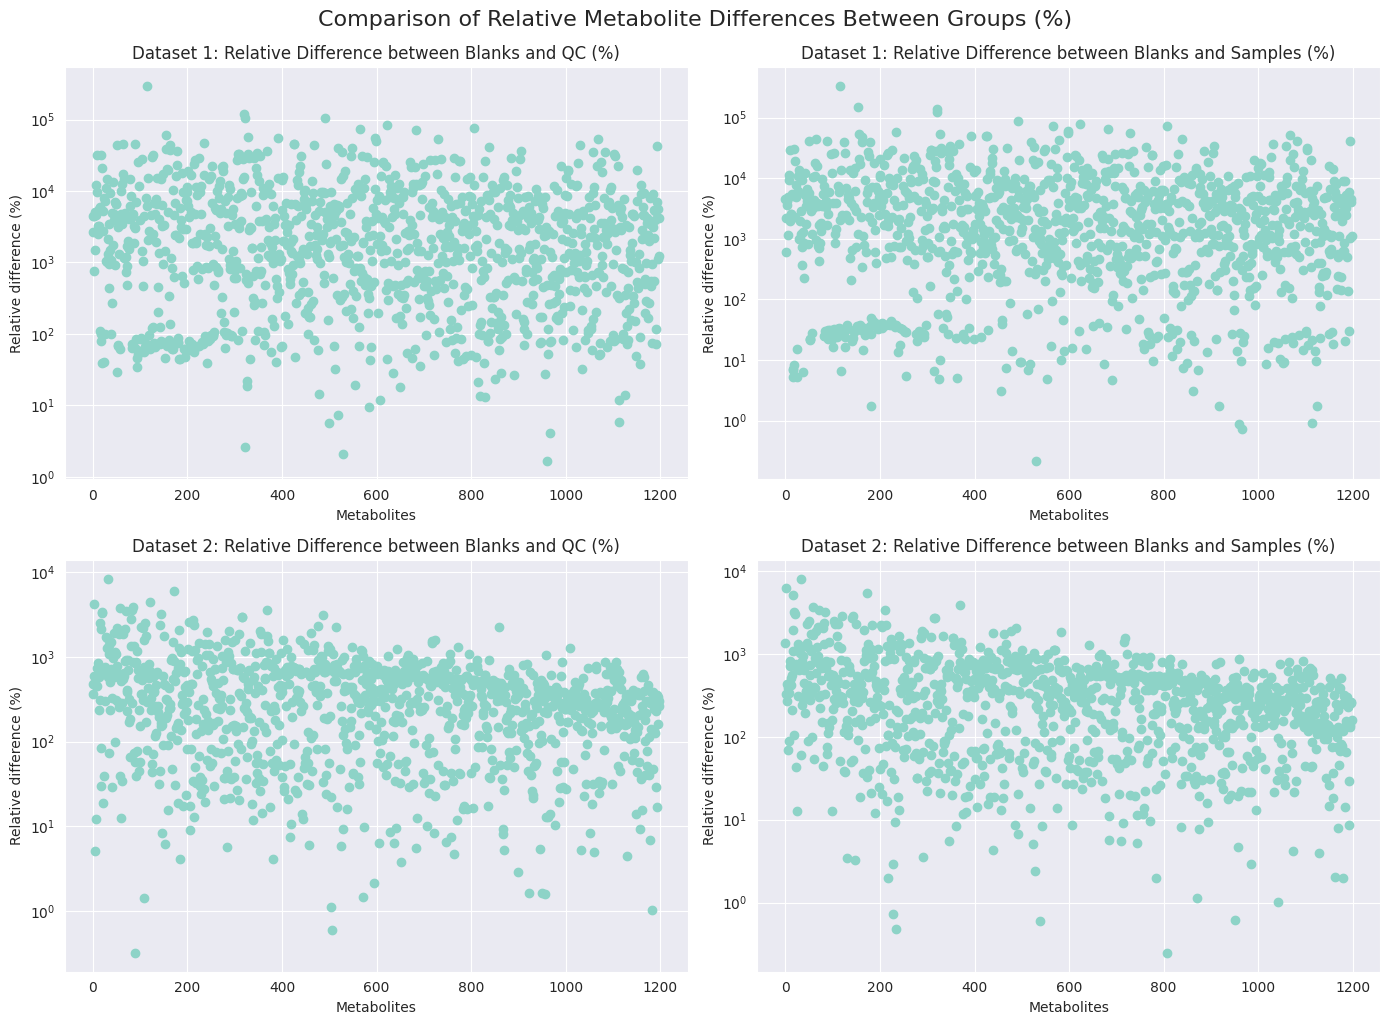

In [59]:
# Create a figure with subplots for both datasets
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Calculate relative differences (as percentages) for dataset 1
rel_diff_qc1 = np.abs((blanki1_srednia - qc1_srednia) / blanki1_srednia) * 100
rel_diff_probki1 = np.abs((blanki1_srednia - probki1_srednia) / blanki1_srednia) * 100

# Calculate relative differences (as percentages) for dataset 2
rel_diff_qc2 = np.abs((blanki2_srednia - qc2_srednia) / blanki2_srednia) * 100
rel_diff_probki2 = np.abs((blanki2_srednia - probki2_srednia) / blanki2_srednia) * 100

# Create scatter plots for dataset 1
axes[0,0].scatter(range(len(blanki1_srednia)), rel_diff_qc1)
axes[0,0].set_title('Dataset 1: Relative Difference between Blanks and QC (%)')
axes[0,0].set_xlabel('Metabolites')
axes[0,0].set_ylabel('Relative difference (%)')
axes[0,0].set_yscale('log')

axes[0,1].scatter(range(len(blanki1_srednia)), rel_diff_probki1)
axes[0,1].set_title('Dataset 1: Relative Difference between Blanks and Samples (%)')
axes[0,1].set_xlabel('Metabolites')
axes[0,1].set_ylabel('Relative difference (%)')
axes[0,1].set_yscale('log')

# Create scatter plots for dataset 2
axes[1,0].scatter(range(len(blanki2_srednia)), rel_diff_qc2)
axes[1,0].set_title('Dataset 2: Relative Difference between Blanks and QC (%)')
axes[1,0].set_xlabel('Metabolites')
axes[1,0].set_ylabel('Relative difference (%)')
axes[1,0].set_yscale('log')

axes[1,1].scatter(range(len(blanki2_srednia)), rel_diff_probki2)
axes[1,1].set_title('Dataset 2: Relative Difference between Blanks and Samples (%)')
axes[1,1].set_xlabel('Metabolites')
axes[1,1].set_ylabel('Relative difference (%)')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.suptitle('Comparison of Relative Metabolite Differences Between Groups (%)', y=1.02, fontsize=16)
plt.show()

Porównanie średnich wartości dla zmiennych pomiędzy grupami wskazuje na to, że dane z pliku nr 1 w niskim stopniu są podobne do blanków.

Dane z pliku nr 1 są w znacznie wyższym stopniu podobne do blanków.